In [48]:
import numpy as np
features = np.load('features.npy')
labels = np.load('labels.npy')


In [49]:
print("Features:", features.shape)
print("Labels:", labels.shape)


Features: (900, 2)
Labels: (900,)


In [50]:
labels = np.load('labels.npy')
unique_labels = np.unique(labels)

print("Unique labels:", unique_labels)
print("Number of unique labels:", len(unique_labels))



Unique labels: [0. 1.]
Number of unique labels: 2


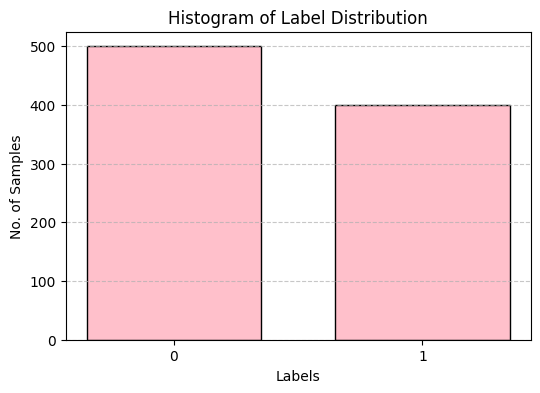

In [51]:
import matplotlib.pyplot as plt

# Load labels
labels = np.load('labels.npy')

# Plot histogram
plt.figure(figsize=(6, 4))
plt.hist(labels, bins=np.arange(-0.5, 2, 1), rwidth=0.7, color='pink', edgecolor='black')
plt.xticks([0, 1])
plt.title("Histogram of Label Distribution")
plt.xlabel("Labels")
plt.ylabel("No. of Samples")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


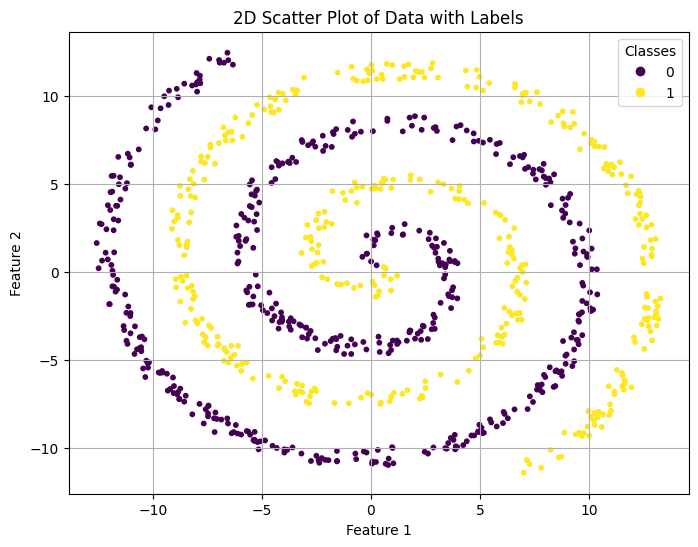

In [52]:
if features.shape[1] == 2:
    # 2D Scatter Plot
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', s=10)
    plt.title('2D Scatter Plot of Data with Labels')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    # Create a legend based on the unique labels and their colors
    legend = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.grid(True)
    plt.show()

elif features.shape[1] == 3:
    # 3D Scatter Plot (if features were 3D)
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=labels, cmap='viridis', s=10)
    ax.set_title('3D Scatter Plot of Data with Labels')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    plt.show()

else:
    print(f"Data has {features.shape[1]} features. Cannot create a 2D or 3D scatter plot.")

In [53]:
from sklearn.model_selection import train_test_split

# Assuming features and labels numpy arrays are already loaded

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42) # Using a random_state for reproducibility

print("Data split complete.")
print(f"Training set shape (features, labels): {X_train.shape}, {y_train.shape}")
print(f"Test set shape (features, labels): {X_test.shape}, {y_test.shape}")


Data split complete.
Training set shape (features, labels): (630, 2), (630,)
Test set shape (features, labels): (270, 2), (270,)


In [54]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
# We'll use default parameters for now, as per the instruction to just "fit" it first.
logistic_classifier = LogisticRegression(random_state=42)

# Train the classifier on the training data
logistic_classifier.fit(X_train, y_train)

print("Logistic Regression classifier trained successfully.")
from sklearn.metrics import accuracy_score

# Predict on the held-out test set
y_pred = logistic_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Classification accuracy on the held-out test set: {accuracy:.4f}")



Logistic Regression classifier trained successfully.
Classification accuracy on the held-out test set: 0.6444


/tmp/ipykernel_7020/2068828311.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_custom, edgecolors='k', marker='x', s=50, label='Test')


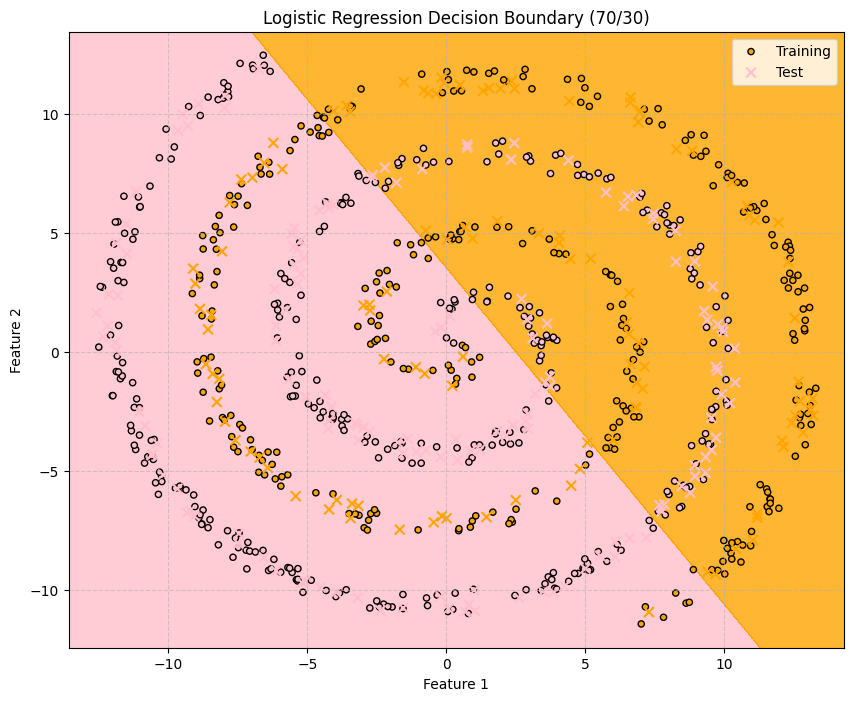

In [55]:
from matplotlib.colors import ListedColormap
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
h = .02  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logistic_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) 
colors = ['pink', 'orange'] 
cmap_custom = ListedColormap(colors)
plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=cmap_custom, alpha=0.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_custom, edgecolors='k', marker='o', s=20, label='Training')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_custom, edgecolors='k', marker='x', s=50, label='Test')

plt.title('Logistic Regression Decision Boundary (70/30)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [56]:
from sklearn.metrics import accuracy_score
ytest_shuffled = np.random.permutation(y_test)

chance_accuracy_single = accuracy_score(ytest_shuffled, y_pred)
print(f"Chance accuracy with a shuffle: {chance_accuracy_single:.4f}")


Chance accuracy with a shuffle: 0.4889


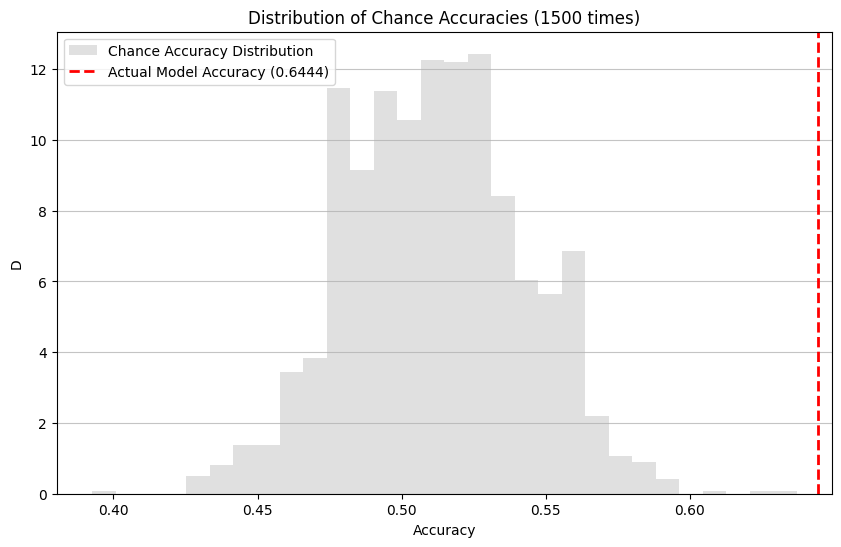


Mean : 0.5115


In [57]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)
y_pred = logistic_classifier.predict(X_test)
actual_test_accuracy = accuracy_score(y_test, y_pred)


n_repetitions = 1500
chance_accuracies = []
for i in range(n_repetitions):
    y_test_shuffled = np.random.permutation(y_test)
    chance_acc = accuracy_score(y_test_shuffled, y_pred)
    chance_accuracies.append(chance_acc)

plt.figure(figsize=(10, 6))
plt.hist(chance_accuracies, bins=30, density=True, alpha=0.7, color='lightgray', label='Chance Accuracy Distribution')
plt.axvline(actual_test_accuracy, color='red', linestyle='dashed', linewidth=2, label=f'Actual Model Accuracy ({actual_test_accuracy:.4f})')

plt.title(f'Distribution of Chance Accuracies ({n_repetitions} times)')
plt.xlabel('Accuracy')
plt.ylabel('D')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()
mean_chance_accuracy = np.mean(chance_accuracies)
print(f"\nMean : {mean_chance_accuracy:.4f}")


SimpleNN(
  (fc1): Linear(in_features=2, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)

 training...
Epoch [50/500], Train Loss: 0.6146, Train Acc: 0.6333, Test Acc: 0.6185
Epoch [100/500], Train Loss: 0.5738, Train Acc: 0.6714, Test Acc: 0.5889
Epoch [150/500], Train Loss: 0.3767, Train Acc: 0.8063, Test Acc: 0.7778
Epoch [200/500], Train Loss: 0.2150, Train Acc: 0.9333, Test Acc: 0.9148
Epoch [250/500], Train Loss: 0.0453, Train Acc: 0.9952, Test Acc: 0.9889
Epoch [300/500], Train Loss: 0.0204, Train Acc: 0.9968, Test Acc: 0.9963
Epoch [350/500], Train Loss: 0.0128, Train Acc: 0.9984, Test Acc: 1.0000
Epoch [400/500], Train Loss: 0.0089, Train Acc: 0.9984, Test Acc: 1.0000
Epoch [450/500], Train Loss: 0.0065, Train Acc: 1.0000, Test Acc: 1.0000
Epoch [500/500], Train Loss: 0.0051, Train Acc: 1.0000, Test Acc: 1.0000

Final Classification accuracy on the held-out test set (Neural Net

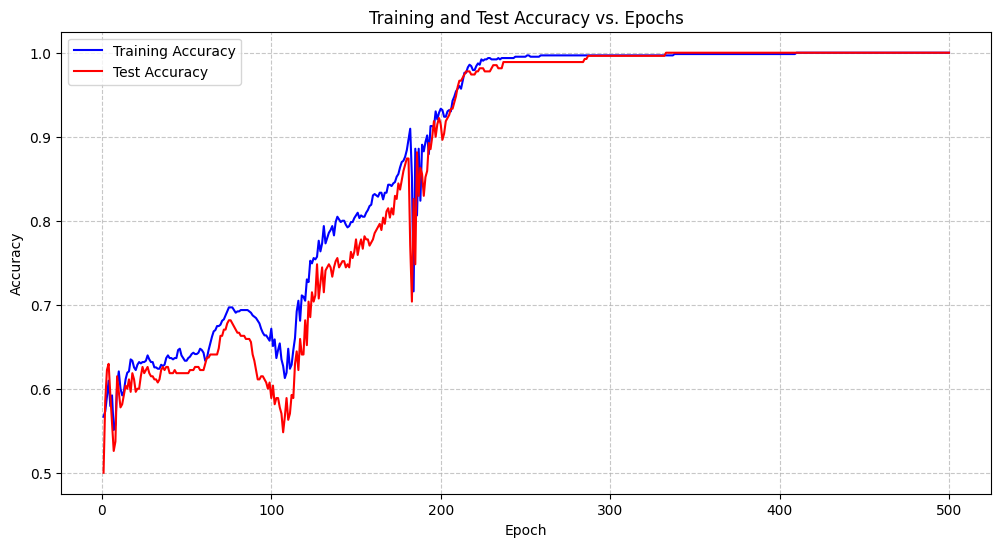

In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

try:
    features = np.load('features.npy')
    labels = np.load('labels.npy')
except FileNotFoundError:
    print("Error: 'features.npy' or 'labels.npy' not found. Please ensure data is loaded.")
    from sklearn.datasets import make_circles
    features, labels = make_circles(n_samples=900, factor=.5, noise=.05, random_state=42)
    features = features * 10 
    print("Using dummy data for demonstration as .npy files were not found.")

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x 

input_size = X_train.shape[1]
hidden_size = 64            
num_classes = len(np.unique(labels))
learning_rate = 0.01
num_epochs = 500  
model = SimpleNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(model) 
train_losses = []
train_accuracies = []
test_accuracies = []
print("\n training...")
for epoch in range(num_epochs):
    model.train() 
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()    
    optimizer.step()     

    train_losses.append(loss.item())
    with torch.no_grad():
        _, predicted_train = torch.max(outputs.data, 1)
        train_acc = accuracy_score(y_train_tensor.numpy(), predicted_train.numpy())
        train_accuracies.append(train_acc)
    model.eval() 
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        _, predicted_test = torch.max(test_outputs.data, 1)
        test_acc = accuracy_score(y_test_tensor.numpy(), predicted_test.numpy())
        test_accuracies.append(test_acc)

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs.data, 1)
    accuracy = accuracy_score(y_test_tensor.numpy(), predicted.numpy())

print(f"\nFinal Classification accuracy on the held-out test set (Neural Network): {accuracy:.4f}")
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy', color='red')
plt.title('Training and Test Accuracy vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


/tmp/ipykernel_7020/2561774079.py:64: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_custom, edgecolors='k', marker='x', s=50, label='Test')


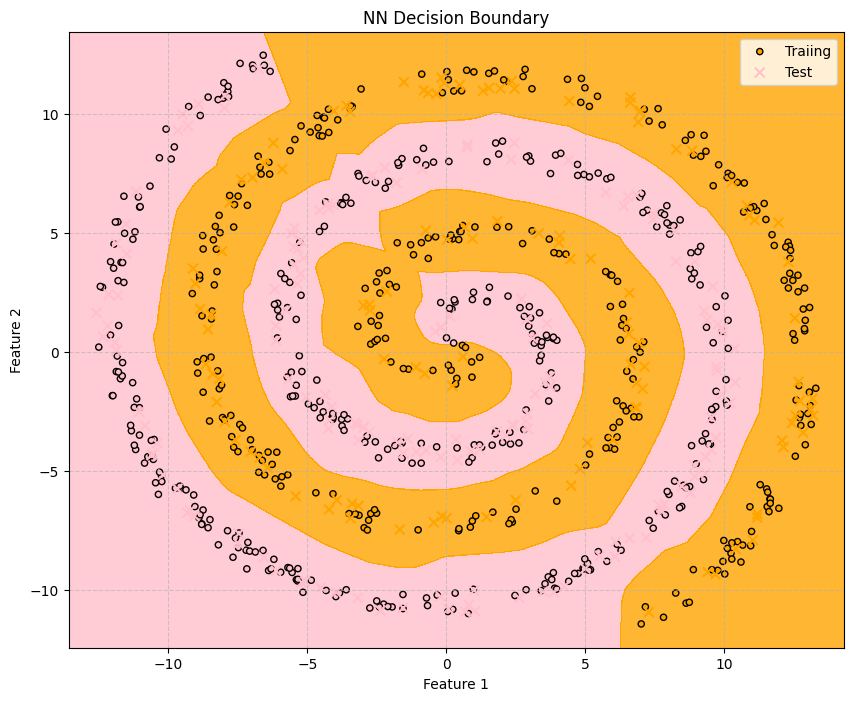

In [59]:

from matplotlib.colors import ListedColormap
try:
    features = np.load('features.npy')
    labels = np.load('labels.npy')
except FileNotFoundError:
    from sklearn.datasets import make_circles
    features, labels = make_circles(n_samples=900, factor=.5, noise=.05, random_state=42)
    features = features * 10

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

optimal_hidden_size = 64
optimal_learning_rate = 0.01
optimal_num_epochs = 300

input_size = X_train.shape[1]
num_classes = len(np.unique(labels))

final_model = SimpleNN(input_size, optimal_hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(final_model.parameters(), lr=optimal_learning_rate)

final_model.train()
for epoch in range(optimal_num_epochs):
    outputs = final_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

mesh_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
final_model.eval()
with torch.no_grad():
    Z_logits = final_model(mesh_tensor)
    _, Z = torch.max(Z_logits.data, 1)
    Z = Z.numpy().reshape(xx.shape)
colors = ['pink', 'orange']
cmap_custom = ListedColormap(colors)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_custom, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_custom, edgecolors='k', marker='o', s=20, label='Traiing')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_custom, edgecolors='k', marker='x', s=50, label='Test')

plt.title('NN Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [60]:
import torch
from torch_geometric.datasets import TUDataset
print(f"Dataset: {dataset}")
print(f"no of graphs: {len(dataset)}")



Dataset: MUTAG(188)
no of graphs: 188


In [14]:
samples = len(dataset)
classes = dataset.num_classes
print(samples)
print(classes)

188
2


In [17]:
first_graph = dataset[0]
num_nodes_first_sample = first_graph.num_nodes
num_edges_first_sample = first_graph.num_edges

print(f"Number of nodes: {num_nodes_first_sample}")
print(f"Number of edges: {num_edges_first_sample}")

Number of nodes in the first sample: 17
Number of edges in the first sample: 38


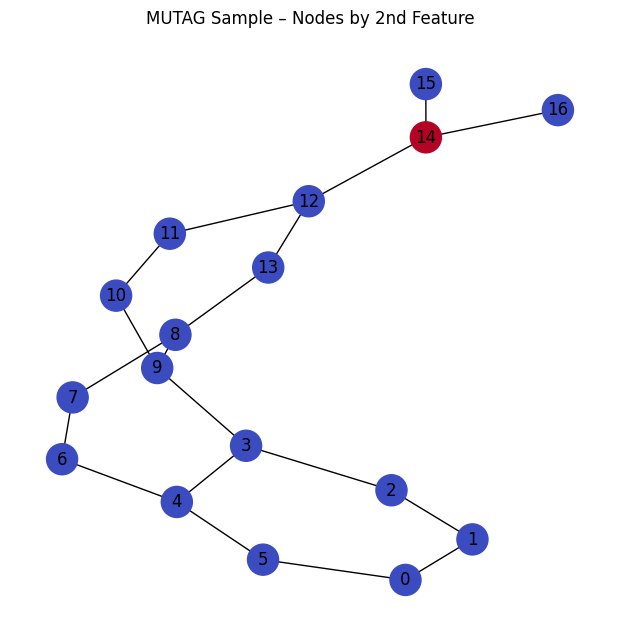

In [61]:
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.datasets import TUDataset
from torch_geometric.utils import to_networkx


data = dataset[0]
G = to_networkx(data, to_undirected=True)
if data.x is not None and data.x.size(1) > 1:
    color_values = data.x[:, 1].tolist()
else:
    color_values = 'blue' 

plt.figure(figsize=(6, 6))
nx.draw(
    G,
    with_labels=True,
    node_color=color_values,
    cmap=plt.cm.coolwarm,
    node_size=500
)
plt.title("MUTAG Sample – Nodes by 2nd Feature")
plt.show()


In [43]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
train_indices, test_indices = train_test_split(range(len(dataset)), test_size=0.3, random_state=42)
train_dataset = dataset[train_indices]
test_dataset = dataset[test_indices]

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
class GCN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.lin = torch.nn.Linear(hidden_channels, num_classes)

    def forward(self, x, edge_index, batch):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch) 
        x = self.lin(x)
        return x

model = GCN(num_node_features=dataset.num_node_features, hidden_channels=64, num_classes=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.batch)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)
def test(loader):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for data in loader:
            out = model(data.x, data.edge_index, data.batch)
            pred = out.argmax(dim=1)
            preds.extend(pred.tolist())
            labels.extend(data.y.tolist())
    return accuracy_score(labels, preds), preds, labels

train_accs, test_accs = [], []
for epoch in range(1, 201):
    train_loss = train()
    train_acc, _, _ = test(train_loader)
    test_acc, _, _ = test(test_loader)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')


Epoch 20, Train Acc: 0.7023, Test Acc: 0.8070
Epoch 40, Train Acc: 0.7328, Test Acc: 0.7719
Epoch 60, Train Acc: 0.7405, Test Acc: 0.7544
Epoch 80, Train Acc: 0.7405, Test Acc: 0.8421
Epoch 100, Train Acc: 0.7252, Test Acc: 0.8246
Epoch 120, Train Acc: 0.7252, Test Acc: 0.7895
Epoch 140, Train Acc: 0.7328, Test Acc: 0.8246
Epoch 160, Train Acc: 0.7328, Test Acc: 0.8421
Epoch 180, Train Acc: 0.7328, Test Acc: 0.8246
Epoch 200, Train Acc: 0.7328, Test Acc: 0.8246


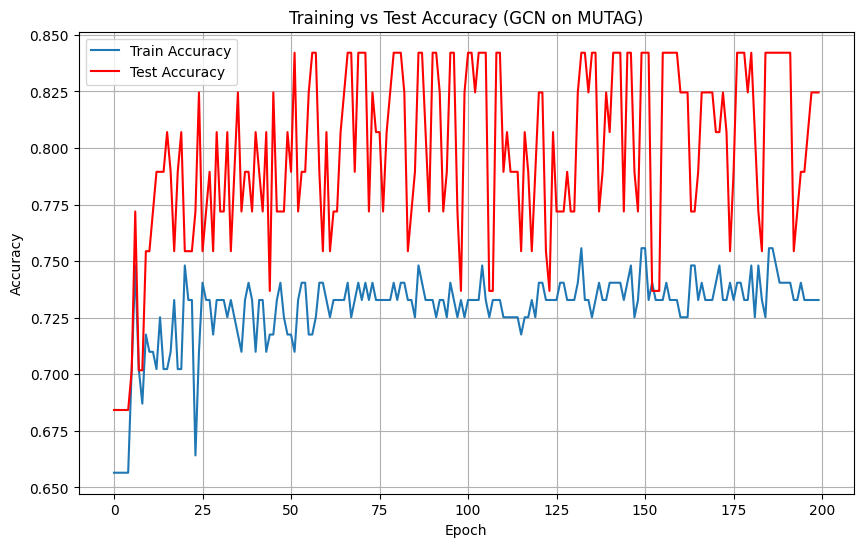

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(train_accs, label='Train Accuracy')
plt.plot(test_accs, label='Test Accuracy', color='red')
plt.title('Training vs Test Accuracy (GCN on MUTAG)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


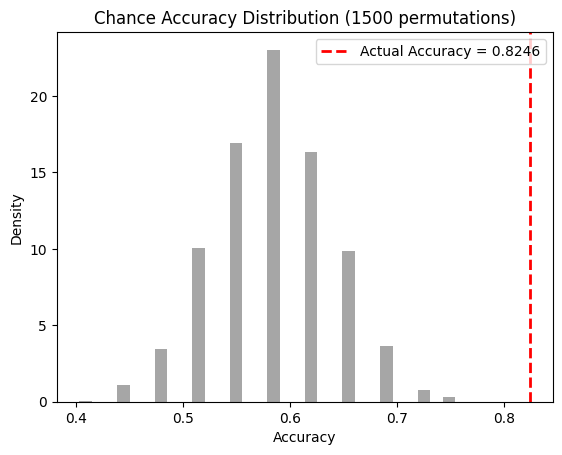

In [45]:
_, y_pred, y_true = test(test_loader)
y_true = np.array(y_true)
y_pred = np.array(y_pred)

n_repetitions = 1500
chance_accuracies = []
for _ in range(n_repetitions):
    shuffled = np.random.permutation(y_true)
    acc = accuracy_score(shuffled, y_pred)
    chance_accuracies.append(acc)

actual_acc = accuracy_score(y_true, y_pred)

plt.hist(chance_accuracies, bins=30, color='gray', alpha=0.7, density=True)
plt.axvline(actual_acc, color='red', linestyle='--', linewidth=2, label=f'Actual Accuracy = {actual_acc:.4f}')
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.title(f'Chance Accuracy Distribution ({n_repetitions} permutations)')
plt.legend()
plt.show()


In [47]:
#evidence 2.c
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import torch
import numpy as np
def get_graph_embeddings(dataset):
    features = []
    labels = []
    for data in dataset:
        x_mean = data.x.mean(dim=0).numpy() 
        features.append(x_mean)
        labels.append(data.y.item())
    return np.array(features), np.array(labels)

X_train, y_train = get_graph_embeddings(train_dataset)
X_test, y_test = get_graph_embeddings(test_dataset)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
baseline_test_acc = logreg.score(X_test, y_test)

print(f"Baseline (Logistic Regression) Test Accuracy: {baseline_test_acc:.4f}")
gcn_test_acc, _, _ = test(test_loader)
print(f'GCN Test Accuracy: {gcn_test_acc:.4f}')


Baseline (Logistic Regression) Test Accuracy: 0.6842
GCN Test Accuracy: 0.8246
